In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq, time, random

# Grid Creation

In [ ]:
def create_grid(size=20, obstacle_prob=0.25):
    """Generate a grid with random obstacles, start, and goal cells."""
    grid = np.random.choice([0, 1], size=(size, size), p=[1-obstacle_prob, obstacle_prob])

    start, goal = None, None
    while start is None or grid[start] == 1:
        start = (random.randint(0, size-1), random.randint(0, size-1))
    while goal is None or grid[goal] == 1 or goal == start:
        goal = (random.randint(0, size-1), random.randint(0, size-1))

    return grid, start, goal

# Heuristics Definition

In [ ]:
def manhattan(a, b): return abs(a[0]-b[0]) + abs(a[1]-b[1])
def euclidean(a, b): return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5
def diagonal(a, b): return max(abs(a[0]-b[0]), abs(a[1]-b[1]))

# A* Search Algorithm

In [ ]:
def astar(grid, start, goal, heuristic):
    """Perform A* Search and return path, expanded nodes, and runtime."""
    moves = [(1,0),(-1,0),(0,1),(0,-1)]  # 4 directions
    pq = [(heuristic(start, goal), 0, start, [])]
    visited = set()
    expanded = 0
    start_time = time.time()

    while pq:
        f, g, current, path = heapq.heappop(pq)
        if current in visited:
            continue
        visited.add(current)
        expanded += 1

        if current == goal:
            runtime = time.time() - start_time
            return path + [current], expanded, runtime

        for dx, dy in moves:
            nx, ny = current[0]+dx, current[1]+dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 0:
                heapq.heappush(pq, (g+1+heuristic((nx,ny),goal), g+1, (nx,ny), path+[current]))

    return None, expanded, time.time() - start_time

In [ ]:
def visualize_grid(grid, start, goal, path=None):
    """Display grid with start, goal, and path."""
    cmap = plt.cm.get_cmap('coolwarm')
    plt.imshow(grid, cmap='binary')
    plt.scatter(start[1], start[0], color='lime', s=100, label='Start')
    plt.scatter(goal[1], goal[0], color='red', s=100, label='Goal')
    if path:
        px, py = zip(*path)
        plt.plot(py, px, color='deepskyblue', linewidth=3, label='Path')
    plt.title("Robot Pathfinding (A*)", fontsize=13)
    plt.legend()
    plt.show()

In [ ]:
def run_experiments(trials=10, size=20):
    heuristics = {'Manhattan': manhattan, 'Euclidean': euclidean, 'Diagonal': diagonal}
    results = {h: {'time': [], 'path_len': [], 'expanded': []} for h in heuristics}

    for hname, hfunc in heuristics.items():
        print(f"Running experiments with {hname} heuristic...")
        for _ in range(trials):
            grid, start, goal = create_grid(size)
            path, expanded, runtime = astar(grid, start, goal, hfunc)
            if path:
                results[hname]['time'].append(runtime)
                results[hname]['path_len'].append(len(path))
                results[hname]['expanded'].append(expanded)
    return results

results = run_experiments()



Running experiments with Manhattan heuristic...
Running experiments with Euclidean heuristic...
Running experiments with Diagonal heuristic...


# Performance Graphs

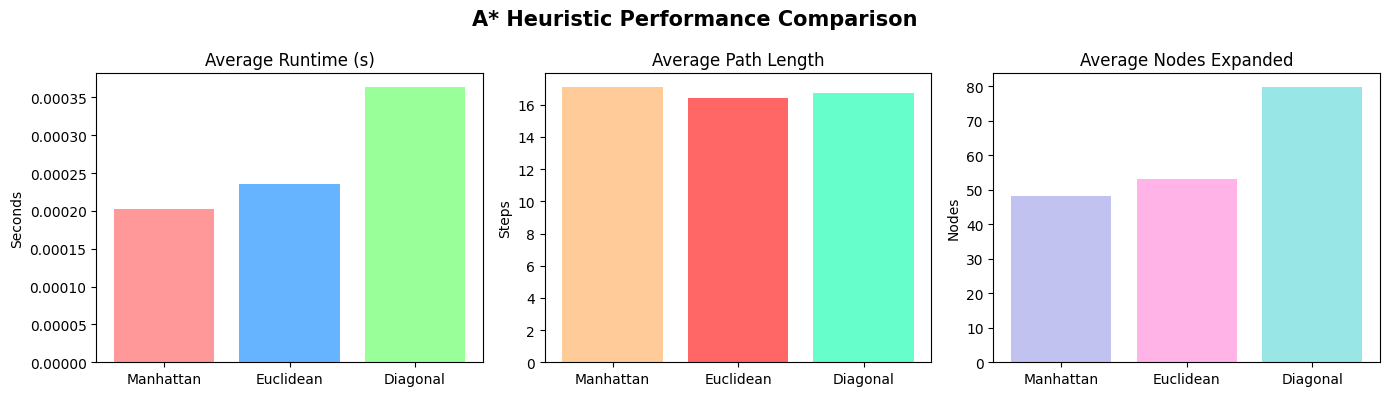

In [ ]:
labels = list(results.keys())
times = [np.mean(results[h]['time']) for h in labels]
pathlens = [np.mean(results[h]['path_len']) for h in labels]
expanded = [np.mean(results[h]['expanded']) for h in labels]

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.bar(labels, times, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Average Runtime (s)")
plt.ylabel("Seconds")

plt.subplot(1,3,2)
plt.bar(labels, pathlens, color=['#ffcc99','#ff6666','#66ffcc'])
plt.title("Average Path Length")
plt.ylabel("Steps")

plt.subplot(1,3,3)
plt.bar(labels, expanded, color=['#c2c2f0','#ffb3e6','#99e6e6'])
plt.title("Average Nodes Expanded")
plt.ylabel("Nodes")

plt.suptitle("A* Heuristic Performance Comparison", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2894124194.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


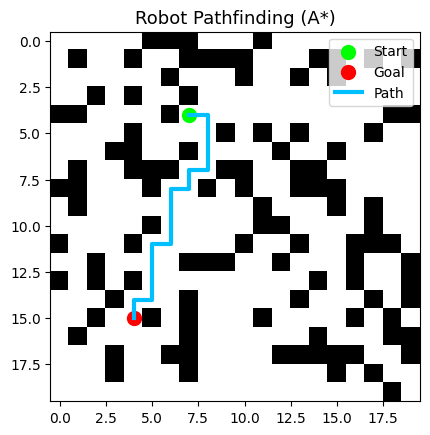

In [ ]:
grid, start, goal = create_grid(20)
path, _, _ = astar(grid, start, goal, manhattan)
visualize_grid(grid, start, goal, path)
